In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

submission = pd.read_csv("sample_submission.csv")
test = pd.read_csv("sample_test.csv")
train = pd.read_csv("sample_train.csv")

In [178]:
print('length of training data is {}'.format(len(train)))
print('length of test data is {}'.format(len(test)))
display(train.head())
display(test.head())

length of training data is 51
length of test data is 11


,id,l1_ratio,alpha,max_iter,n_samples,n_features,time
0,0,0.304083,0.0001,417,1089,327,0.409987
1,1,0.727744,0.0010,578,790,373,3.950953
2,2,0.745885,0.0100,588,428,1198,0.368702
3,3,0.474605,0.0010,829,877,313,1.004559
4,4,0.395049,0.0010,167,216,644,0.802800


,id,l1_ratio,alpha,max_iter,n_samples,n_features,scale
0,0,0.690384,0.001,602,1376,1078,40.832757
1,1,0.215088,0.001,522,598,1528,68.611537
2,2,0.217458,0.001,398,553,1008,61.713892
3,3,0.120303,0.001,439,1977,1319,58.631194
4,4,0.458851,0.010,278,1826,1530,87.315374


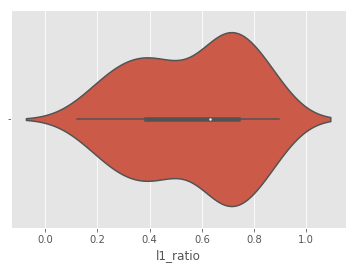

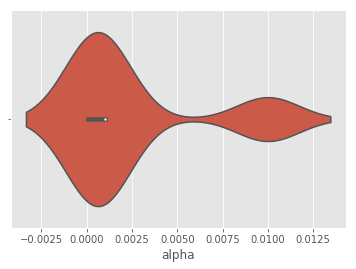

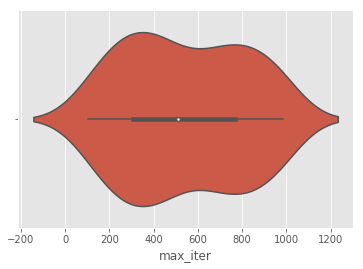

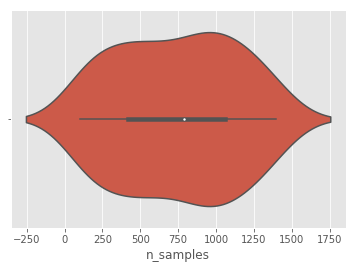

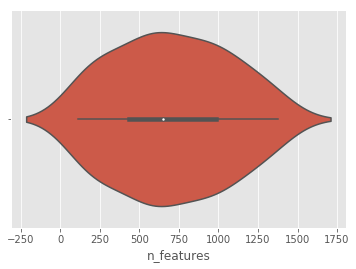

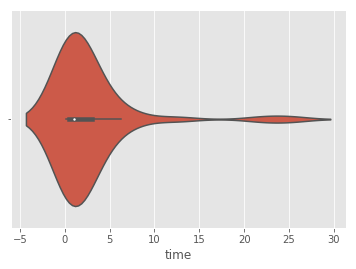

In [117]:
# 每个属性的特点
C = train.columns[1:]
for i in range(len(C)):
    plt.figure(i)
    Z = train[C[i]].values
    sns.violinplot(Z)
    plt.xlabel(C[i])
plt.show()

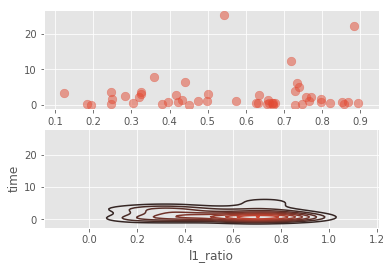

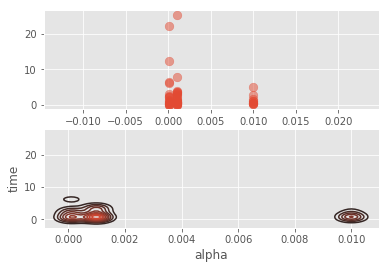

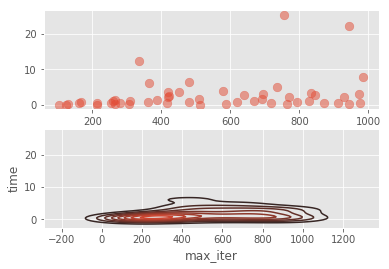

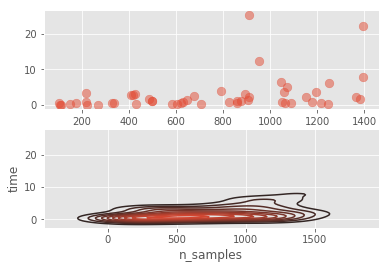

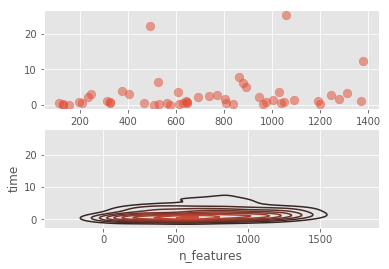

In [182]:
# 属性和时间的关系
C = train.columns[1:-1]
for i in range(len(C)):
    plt.figure(i)
    plt.subplot(211)
    Z = train[[C[i],'time']].values
    plt.scatter(Z[:,0],Z[:,1], s=75, alpha=.5)
    plt.subplot(212)
    sns.kdeplot(Z[:,0],Z[:,1])
    plt.xlabel(C[i])
    plt.ylabel('time')  
plt.show()

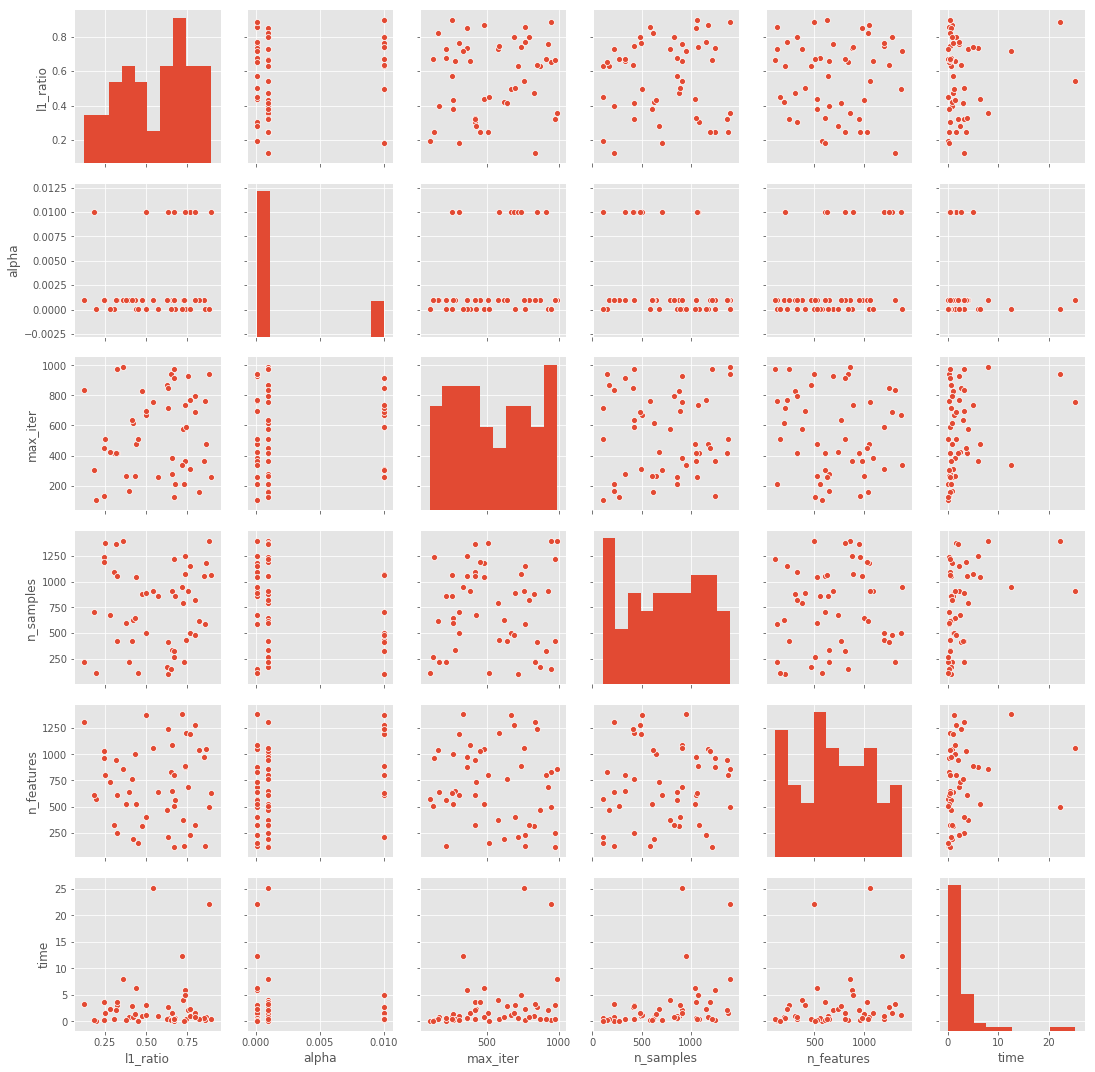

In [119]:
# 两两关系
sns.pairplot(train.loc[:, train.columns != 'id'])

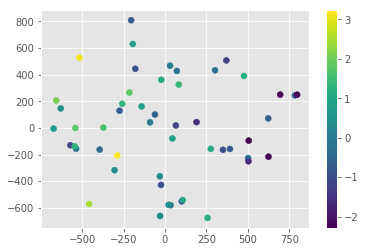

In [134]:
# PCA
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)

X = pca.fit_transform(train.iloc[:,1:-1].values, train['time'].values)

plt.scatter(X[:,0], X[:,1], c=np.log(train['time']))
plt.colorbar()
plt.show()

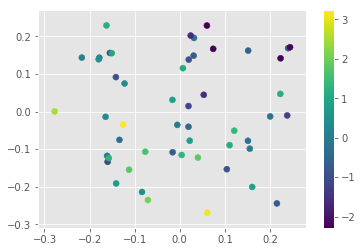

In [137]:
# ICA
from sklearn import decomposition

fica = decomposition.FastICA(n_components=2)

X = fica.fit_transform(train.iloc[:,1:-1].values, train['time'].values)

plt.scatter(X[:,0], X[:,1], c=np.log(train['time']))
plt.colorbar()
plt.show()

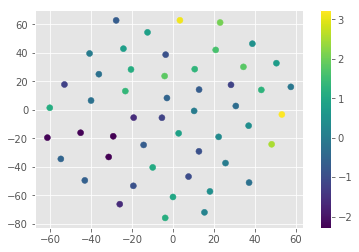

In [138]:
# TSNE
from sklearn.manifold import TSNE

X = TSNE(n_components=2).fit_transform(train.iloc[:,1:-1].values, train['time'].values)

plt.scatter(X[:,0], X[:,1], c=np.log(train['time']))
plt.colorbar()
plt.show()

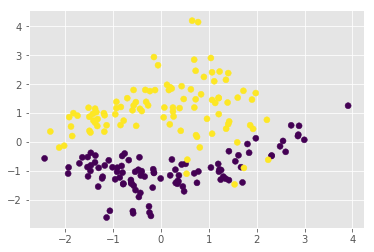

In [160]:
# make_classifcation
from sklearn.datasets import make_classification
tx, ty = make_classification(200,10,shuffle=False)
plt.scatter(tx[:,0], tx[:,1], c=ty)
plt.show()

In [172]:
# end2end
# build the model
from sklearn import linear_model
from sklearn import tree
reg = linear_model.LinearRegression()
# reg = tree.DecisionTreeRegressor()
reg.fit(train.iloc[:,1:-1].values, train['time'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
# predict
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(train.iloc[:,1:-1].values)
mean_squared_error(train['time'].values,y_pred)

16.73614940652795

In [174]:
# visualization
form = pd.DataFrame()
form['pred'] = y_pred
form['train'] = train['time'].values
display(form)

,pred,train
0,2.043468,0.409987
1,2.603711,3.950953
2,1.941987,0.368702
3,3.632634,1.004559
4,-1.188678,0.802800
5,8.109629,7.916113
6,6.487236,2.206062
7,2.202022,2.407143
8,0.612140,1.002341
9,4.969849,1.607144
